# 🍀Подключение необходимых библиотек для работ с данными

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings
warnings.simplefilter('ignore')

Загружаем данные и проверяем что запарсили, также удаляю дубликаты

In [2]:
df = pd.read_csv("main_df_to_yp.csv").drop_duplicates()
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,ID 120271947,homeowner,https://elektrougli.cian.ru/sale/flat/305815701/,Электроугли,sale,flat,7.0,9.0,2.0,47.8,...,NaN,NaN,28.2,8.0,79623650661,NaN,Школьная,40,Железнодорожная,NaN
1,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/299601370/,Электроугли,sale,flat,7.0,14.0,1.0,41.0,...,NaN,NaN,18.0,9.0,79623638905,NaN,Школьная,38,Железнодорожная,NaN
2,ID 115031885,homeowner,https://elektrougli.cian.ru/sale/flat/307496224/,Электроугли,sale,flat,2.0,5.0,1.0,25.0,...,NaN,NaN,12.0,5.0,79660478973,NaN,Советская,11,Железнодорожная,NaN
3,ID 15867135,real_estate_agent,https://elektrougli.cian.ru/sale/flat/307048067/,Электроугли,sale,flat,5.0,5.0,1.0,33.3,...,NaN,NaN,18.0,8.0,79104572936,NaN,Пионерская,6Б,Железнодорожная,NaN
4,ОкругА,real_estate_agent,https://elektrougli.cian.ru/sale/flat/308257607/,Электроугли,sale,flat,1.0,3.0,2.0,45.8,...,NaN,NaN,26.7,7.0,79623638905,NaN,переулок 2-й Троицкий,3,Железнодорожная,NaN


In [3]:
# проверяем размер файла
df.shape

(19974, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19974 entries, 0 to 20045
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                19494 non-null  object 
 1   author_type           19498 non-null  object 
 2   url                   19970 non-null  object 
 3   location              19581 non-null  object 
 4   deal_type             19973 non-null  object 
 5   accommodation_type    19973 non-null  object 
 6   floor                 19973 non-null  float64
 7   floors_count          19973 non-null  float64
 8   rooms_count           19827 non-null  float64
 9   total_meters          19973 non-null  float64
 10  price                 19896 non-null  float64
 11  year_of_construction  15813 non-null  object 
 12  object_type           0 non-null      float64
 13  house_material_type   2623 non-null   object 
 14  heating_type          0 non-null      float64
 15  finish_type           35

# 🍀Анализ и чистка данных
Для начала заменим все пропуски данных, которые имеют значение -1 на NaN, для дальнейшей удобной работы с этими данными.<br>
Также заменим floor, floors_count, rooms_count с значения float на int, т.к. этаж, количество этажей в доме и количество комнат не могу быть с плавующей запятой.<br>
В location, rooms_count, price можно заметить что нехватает данных, так что удалим строк в которых нет данных.<br>
За одно сразу удалим лишние столбцы, которые никак не будут влиять на цену квартиры и м2

In [5]:
df = df.replace(-1,np.nan)
df = df.replace("-1",np.nan)
df = df.replace(-1.0,np.nan)
df = df.replace("-1.0",np.nan)
df = df.dropna(subset=['location', 'price', 'rooms_count'])
df['floor'] = df['floor'].astype(int)
df['floors_count'] = df['floors_count'].astype(int)
df['rooms_count'] = df['rooms_count'].astype(int)
df.drop(['phone', 'deal_type', 'accommodation_type', 'object_type', 'heating_type'], axis=1, inplace=True)
print(f'Количество столбцов после чистки {df.shape[1]} столбцы')
# Необходимо в сохранённом файле изменить ��� на 0, для избежания ошибок

Количество столбцов после чистки 19 столбцы


In [6]:
df.dtypes

author                   object
author_type              object
url                      object
location                 object
floor                     int64
floors_count              int64
rooms_count               int64
total_meters            float64
price                   float64
year_of_construction     object
house_material_type      object
finish_type              object
living_meters           float64
kitchen_meters          float64
district                 object
street                   object
house_number             object
underground              object
residential_complex      object
dtype: object

Проверим количество пропущенных значений в столбцах

In [7]:
df.isnull().sum()

author                    454
author_type               447
url                         0
location                    0
floor                       0
floors_count                0
rooms_count                 0
total_meters                0
price                       0
year_of_construction     4034
house_material_type     16846
finish_type             16007
living_meters            4345
kitchen_meters           2598
district                 9494
street                   2937
house_number             2024
underground              5882
residential_complex     10224
dtype: int64

# 🍀Удаляем строки в которых есть некорректные значения года постройки дома, также дома которые будет построены позже

In [8]:
replace_list = ["Напишите автору","Залоговая недвижимость","Аукцион","Позвоните автору","Подписаться на дом",]
for obj in replace_list:
    df = df.replace(obj, np.nan)

def filter_properties_until_2024(df):
    df["year_of_construction"] = df["year_of_construction"].fillna(-1)
    df["year_of_construction"] = df["year_of_construction"].astype(int)
    filtered_df = df[df["year_of_construction"] <= 2024]
    filtered_df.to_csv("main1.csv", index=False, encoding="utf-8")


output_csv_path = "main1.csv"
df_filtered = filter_properties_until_2024(df)

# 🍀Проверка пропусков данных в %

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author - 2%
author_type - 2%
url - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
house_material_type - 87%
finish_type - 83%
living_meters - 22%
kitchen_meters - 13%
district - 49%
street - 15%
house_number - 10%
underground - 30%
residential_complex - 53%


# 🍀Удаляём ещё несколько не нужных столбцов, которые не будут влиять на цену квартир


In [10]:
df.drop(['house_material_type', 'finish_type', 'author', 'url'], axis=1, inplace=True)

In [11]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 2%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 22%
kitchen_meters - 13%
district - 49%
street - 15%
house_number - 10%
underground - 30%
residential_complex - 53%


# 🍀Нам сложно будет найти данные о ЖК (residential_complex), и номере дома (house_number)  
Также изменим все не достующие данные в underground и street на NaN и избавлюсь от строк с названием типа автора, года постройки

In [12]:
df.drop(['residential_complex', 'house_number'], axis=1, inplace=True)
df = df.dropna(subset=['underground', 'street', 'author_type', 'year_of_construction'])

In [13]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 22%
kitchen_meters - 11%
district - 59%
street - 0%
underground - 0%


# 🍀Сейчас нам необходимо разобраться с пропусками в living_meters и kitchen_meters  
Эти данные буду сильно влиять на образование цены квартиры или м2

In [14]:
df['living_meters'] = df['living_meters'].fillna(df['living_meters'].median()) 
df['kitchen_meters'] = df['kitchen_meters'].fillna(df['kitchen_meters'].median())

In [15]:
# сразу проверим значения после подставки моды
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 0%
kitchen_meters - 0%
district - 59%
street - 0%
underground - 0%


# 🍀Создадим функцию для для замены отсутствия данных в столбце district

In [16]:
df['temp_district'] = df['district']
msk_condition = (df['location'] == 'Москва') & df['district'].isna()
df.loc[msk_condition & df['underground'].notna(), 'temp_district'] = df['underground']
df.loc[msk_condition & df['underground'].isna(), 'temp_district'] = 'Москва'
other_condition = df['district'].isna() & (df['location'] != 'Москва')
df.loc[other_condition, 'temp_district'] = df['location']
df['district'] = df['temp_district']
df.drop(columns=['temp_district'], inplace=True)
# Здесь сначала мы создаём временной столбец для хранения новых данных, после чего заполняем значения для Москвы, а других локаций, копируем данные из временного столбца в столбец 'distirct' нашего файла. 

In [17]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 0%
kitchen_meters - 0%
district - 0%
street - 0%
underground - 0%


<Axes: >

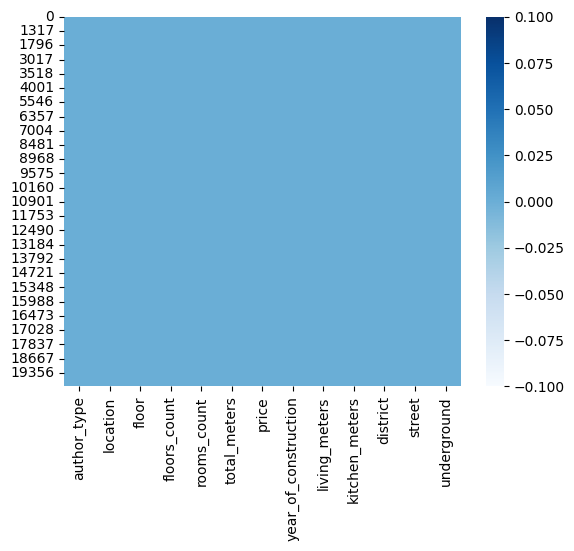

In [18]:
# проверим пропуски после чистки
sns.heatmap(df.isnull(), cmap='Blues', )

# 🍀Функция для кодирования данных и проверки их на зависимости

In [19]:
from sklearn import preprocessing
#функция, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
#и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) #Теперь encoded data содержит закодированные категориальные признаки
encoded_data.head() #проверяем

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground
0,1,44,7,9,2,47.8,6600000.0,2002,28.2,8.0,192,649,80
1,3,44,7,14,1,41.0,5350000.0,-1,18.0,9.0,192,649,80
2,1,44,2,5,1,25.0,3250000.0,1981,12.0,5.0,192,559,80
3,3,44,5,5,1,33.3,3500000.0,1980,18.0,8.0,192,490,80
4,3,44,1,3,2,45.8,4850000.0,-1,26.7,7.0,192,1556,80


In [22]:
df.shape

(11652, 13)

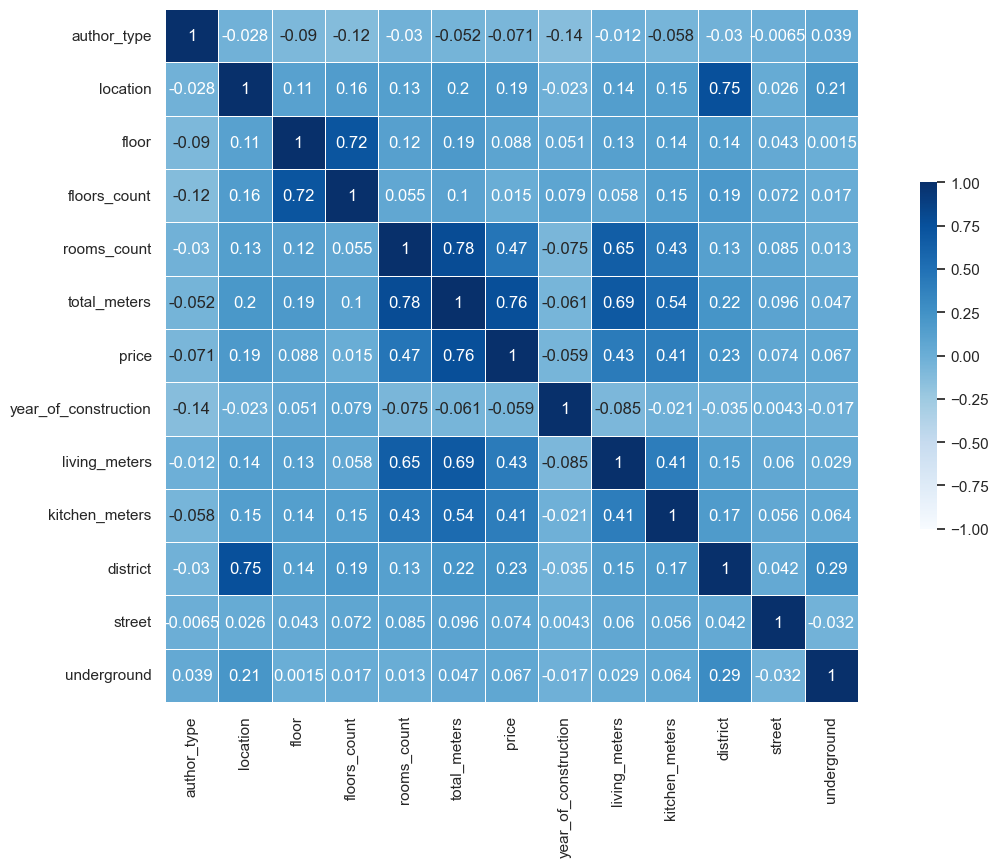

In [20]:
sns.set(style="darkgrid")

# Копируем данные и считаем корреляцию
temp3 = encoded_data.copy()
corr = temp3.corr()
f, ax = plt.subplots(figsize=(16, 9))
cmap = sns.color_palette("Blues", as_cmap=True)
# Создаем тепловую карту без маски
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# 🍀Сделаем функцию для расчёт средней цены м²

In [21]:
dict_city = df['location'].unique()

def price_for_meter(location):
    city = df[df['location'] == location]
    df['total_meters'] = df['total_meters'].astype(float) # с типом float будет легче обрабатывать данные
    price_for_city = city['price'].sum()
    
    clean_data = city['total_meters'].sum()
    return round(price_for_city/clean_data, 2)

with open('info.csv', 'w', newline='', encoding='UTF-8') as csvfile:
    names = ['city', 'price_for_meter']
    writer = csv.DictWriter(csvfile, fieldnames=names)
    writer.writeheader()
    for city in dict_city:
        writer.writerow({'city': city, 'price_for_meter': price_for_meter(city)})

In [22]:
info = pd.read_csv('info.csv')
info.sort_values(["price_for_meter"], axis=0, ascending=[False], inplace=True)

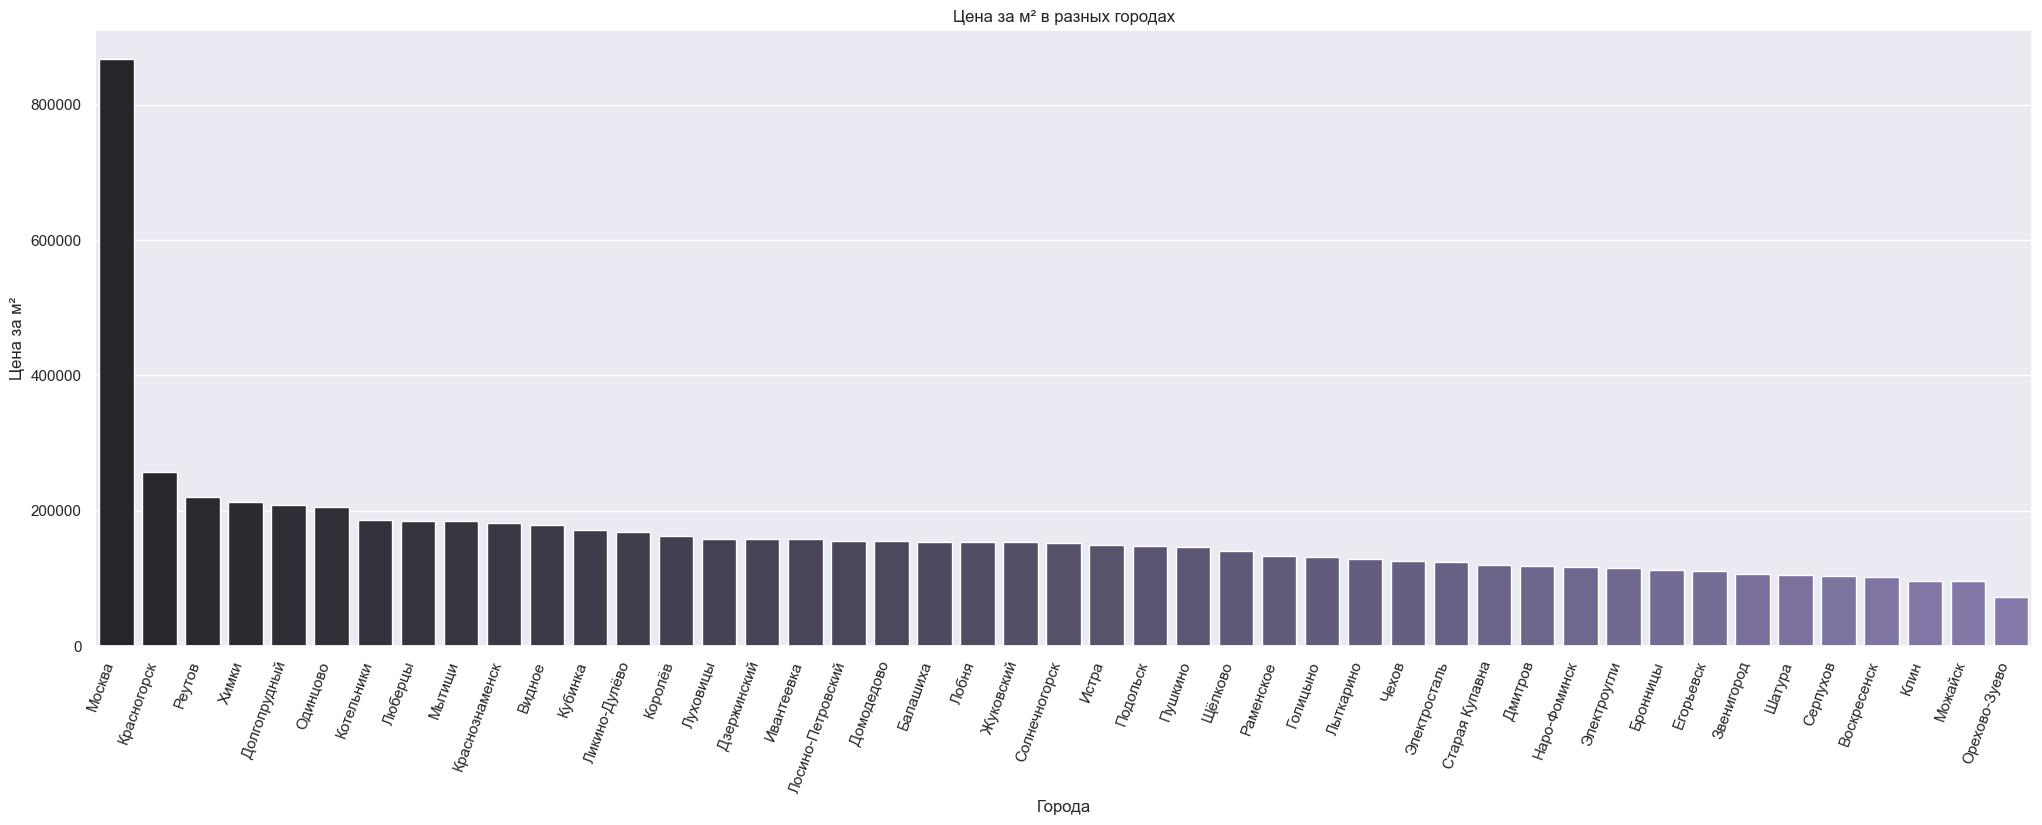

In [23]:
# График для средней цены за м2 во всех городах
sns.set_style("darkgrid")
plt.figure(figsize=(25, 8))
sns.barplot(hue='city', legend=False, x='city', y='price_for_meter', data=info, color='m')
plt.title('Цена за м² в разных городах')
plt.xlabel('Города')
plt.ylabel('Цена за м²')
plt.xticks(rotation=70, ha='right')
plt.show()

# 🍀Влияние количества комнат на рост м²

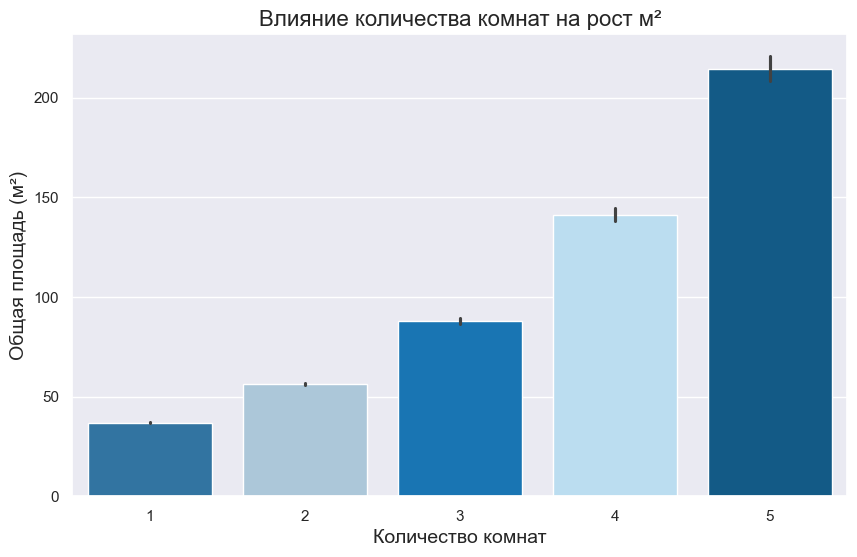

In [24]:
custom_palette = ["#1f77b4", "#a4c8e1", "#007acc", "#b2e0f9", "#005f99"]
plt.figure(figsize=(10, 6))
sns.barplot(x='rooms_count', y='total_meters', data=encoded_data, palette=custom_palette)
plt.title("Влияние количества комнат на рост м²", fontsize=16)
plt.xlabel("Количество комнат", fontsize=14)
plt.ylabel("Общая площадь (м²)", fontsize=14)
plt.show()

# 🍀Средняя цена по этажам

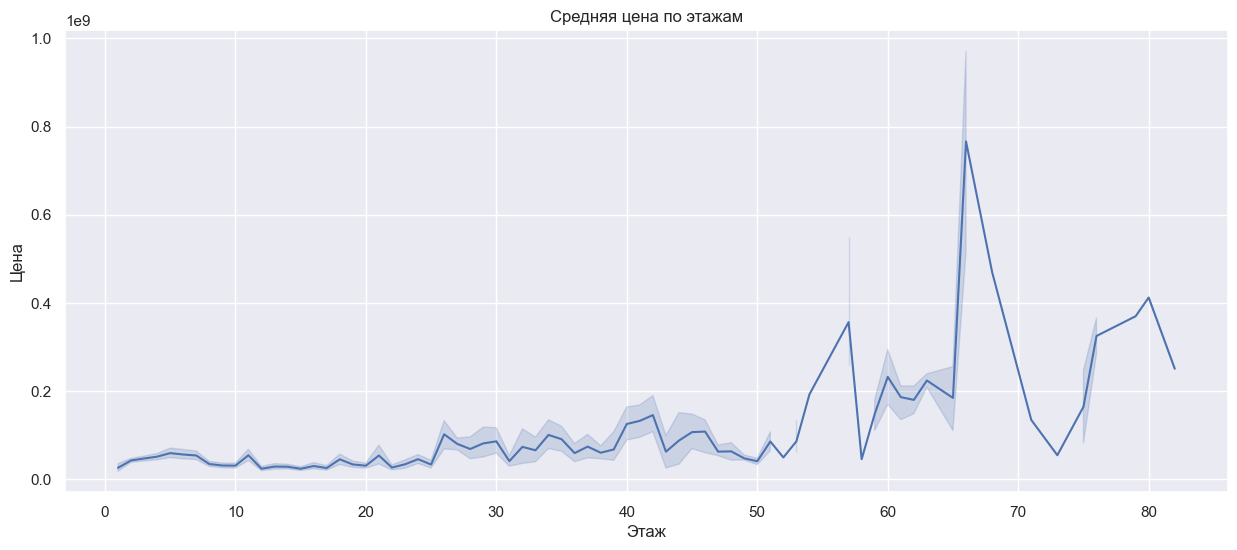

In [25]:
plt.figure(figsize=(15, 6)) 
sns.lineplot(x='floor', y='price', data=encoded_data, palette='Blues') 
plt.title('Средняя цена по этажам') 
plt.xlabel('Этаж') 
plt.ylabel('Цена') 
plt.show() 

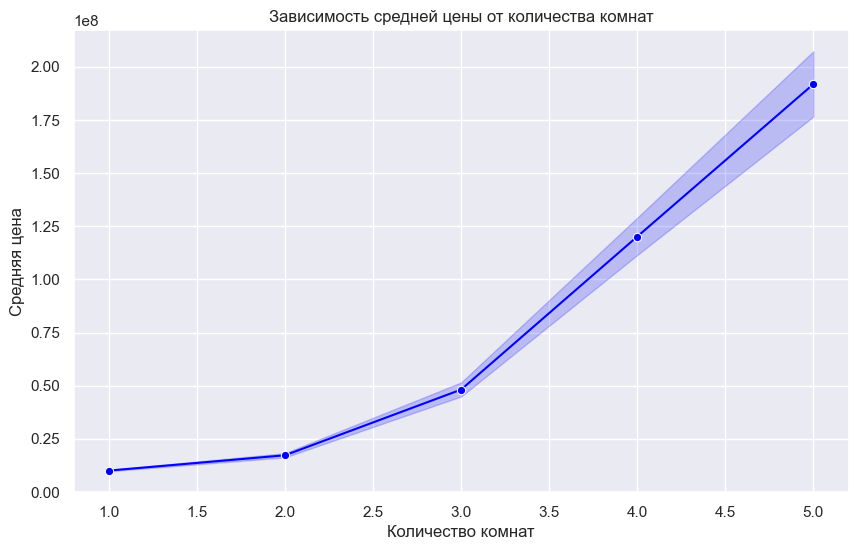

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='rooms_count', y='price', data=encoded_data, marker='o', color='blue')
plt.title('Зависимость средней цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена')
plt.grid(True)
plt.show()

# 🍀Соотношение жилой и кухонной площади 

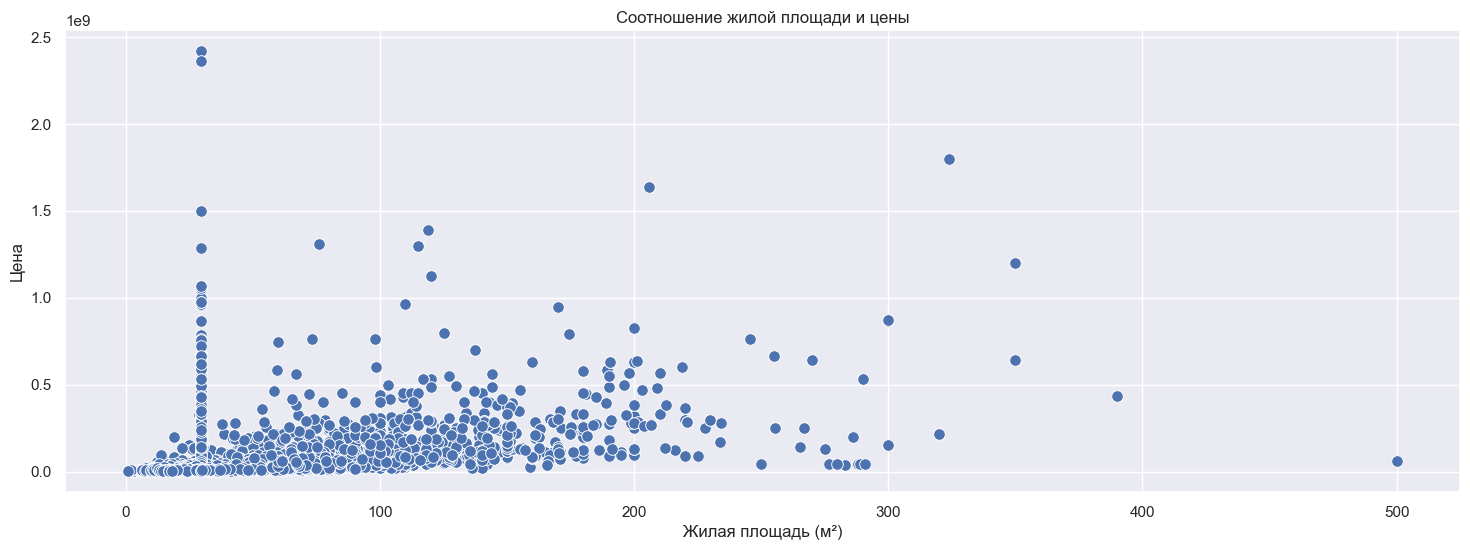

In [27]:
# График: Соотношение жилой площади и цены
plt.figure(figsize=(18, 6)) 
sns.scatterplot(x='living_meters', y='price', legend=False, data=encoded_data, palette='Blues', s=70) 
plt.title('Соотношение жилой площади и цены') 
plt.xlabel('Жилая площадь (м²)') 
plt.ylabel('Цена') 
plt.show()

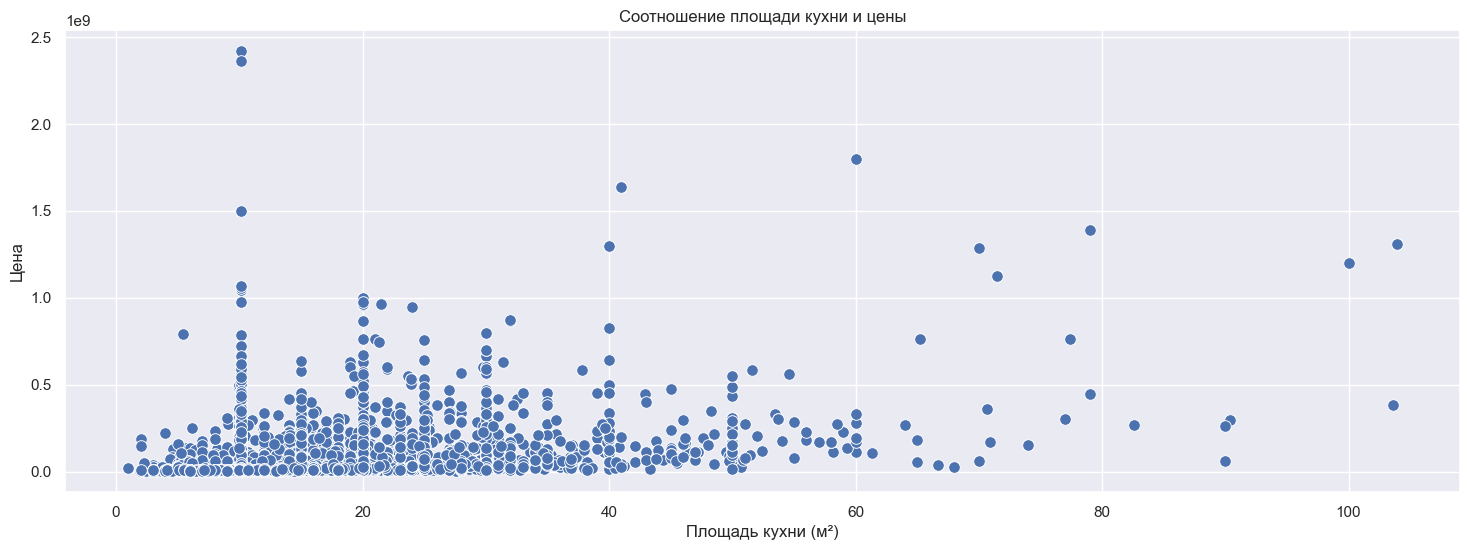

In [28]:
# График: Соотношение жилой площади и цены
plt.figure(figsize=(18, 6)) 
sns.scatterplot(x='kitchen_meters', y='price', legend=False, data=encoded_data, palette='Blues', s=70) 
plt.title('Соотношение площади кухни и цены') 
plt.xlabel('Площадь кухни (м²)') 
plt.ylabel('Цена') 
plt.show()

# 🍀Поиск самых дорогих и дешевых квартир

In [29]:
most_expensive = df.nlargest(5, 'price')
cheapest = df.nsmallest(5, 'price')

def format_price(price):
    return '{:,.2f}'.format(price).replace(',', ' ')

most_expensive['price'] = most_expensive['price'].apply(format_price)
cheapest['price'] = cheapest['price'].apply(format_price)

print("Самые дорогие квартиры:")
print(most_expensive[['price', 'district', 'rooms_count', 'total_meters']])

print("\nСамые дешевые квартиры:")
print(cheapest[['price', 'district', 'rooms_count', 'total_meters']])

Самые дорогие квартиры:
                  price     district  rooms_count  total_meters
14968  2 418 390 000.00  Пресненский            4         620.1
14974  2 361 200 000.00  Пресненский            5         590.3
13812  1 800 000 000.00    Хамовники            5         469.9
13568  1 635 583 643.00    Хамовники            5         423.0
12552  1 635 113 268.00    Хамовники            5         423.0

Самые дешевые квартиры:
              price       district  rooms_count  total_meters
3309   1 600 000.00       Тверской            1          29.7
4688   1 935 000.00   Долгопрудный            2          39.5
11486  1 935 000.00   Долгопрудный            2          39.5
646    2 000 000.00  Ликино-Дулёво            1          21.7
3767   2 290 000.00         Видное            2          31.0


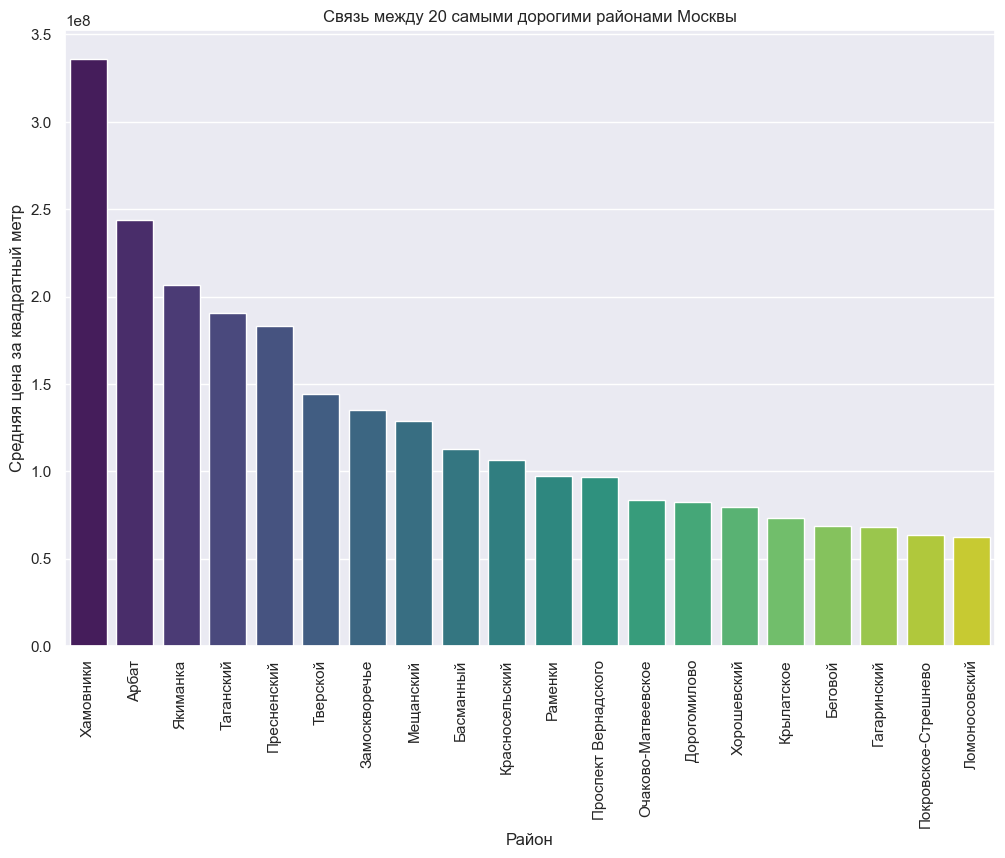

In [30]:
# Группируем данные по районам и вычисляем среднюю цену за квадратный метр
average_price_by_district = df.groupby('district')['price'].mean().reset_index()

# Сортируем данные по средней цене за квадратный метр в порядке убывания
average_price_by_district = average_price_by_district.sort_values(by='price', ascending=False)
top_20_districts = average_price_by_district.head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x='district', y='price', data=top_20_districts, palette='viridis')
plt.title('Связь между 20 самыми дорогими районами Москвы')
plt.xlabel('Район')
plt.ylabel('Средняя цена за квадратный метр')
plt.xticks(rotation=90)  # Поворачиваем подписи районов на 90 градусов для лучшей читаемости
plt.show()